<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_21_Distribuci%C3%B3n_de_probabilidad_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de probabilidad normal

# Objetivo

Calcular probabilidades, valor esperado y variabildiad de datos de varibles aleatorias con comportamiento de distribución  normal.


# Descripción

- Se cargan librerías adecuadas
- Se cargan funciones adecuadas
- Se describen ejercicios extraídos de literatura de contexos diversos con caraterísticas de distribuciones normales.
- Se calculan probabilidades
- Se calculan valores esperados y variabilidad de los datos,
- Se calculan números aletorios
- Se calculan valores de variable aletoria $x$ a partir de probabilidades específicas


# Fundamento teórico

La distribución continua de probabilidad más importante en todo el campo de la estadística es la distribución normal. Su gráfica, que se denomina curva normal, es la curva con forma de campana .

La distribución normal a menudo se denomina distribución Gaussiana, en honor de Karl Friedrich Gauss (1777-1855), quien también derivó su ecuación a partir de un estudio de errores en mediciones repetidas de la misma cantidad [@walpole2012].

## Fórmula de densidad

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde: $π=3.14159$ y $e=2.71828$.

## Función de Distribución Acumulativa (CDF):

La CDF es una función que proporciona la probabilidad acumulativa de que una variable aleatoria sea menor o igual a un valor específico. Se denota como:
$$
F(x) = \int_{-∞}^{x}f(x)dx
$$

donde $f(x)$ es la PDF.

## Valor Esperado (Media)

El valor esperado de una variable aleatoria continua se calcula como el promedio ponderado de todos los valores posibles, donde el peso es dado por la PDF. Matemáticamente, se expresa como
$$
\mu_{x} = VE(x) = \int_{-\infty}^{\infty}x\cdot f(x)dx
$$

## Varianza y Desviación Estándar:

La varianza y la desviación estándar miden la dispersión de una variable aleatoria continua. La varianza se calcula como:

$$
varianza = \sigma^2=V(x)=\int_{-\infty}^{\infty}(x - \mu)^2\cdot f(x) dx
$$
, donde $\mu$ es la media, y la desviación estándar es la raíz cuadrada de la varianza

$$
\sigma = \sqrt{\sigma^2}
$$

## Funciones de python

En python se pueden utilizar las siguientes funciones para tratar con una distribución normal:

- *norm.rvs()* para calcular números aleatorios.
- *norm.pdf()* para calcular la densidad.
- *norm.cdf()* para calcular la probabilidad acumulada.
- *norm.ppf()* para calcular el valor de la a partir de una probabilidad, es la función inversa de *cdf()*.



# Desarrollo


## Cargar librerías

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

In [2]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0, v_color = 'red'):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne estándar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # LA probailidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área '+str(a) + "-"+str(b)+"="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend(loc='upper right')
    # plt.grid(True)
    plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

def f_visualizar_VE_desv_std_normal(valores):
  # Se calcula la media de los valores
  VE = media = np.mean(valores)

  # Se calcula la desviacióne st´dnar de los valores
  desv_std = np.std(valores)

  # Crear un rango de valores para la PDF
  x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

  # Calcular la PDF de la distribución normal
  pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))

  # Agregar una línea punteada
  plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
  plt.axvline(x=VE - desv_std, color='blue', linestyle='--', label='Desv. Std='+str(np.round(desv_std, 2)))
  plt.axvline(x=VE + desv_std, color='blue', linestyle='--')

  # La probadilidad de VE ± desv_std
  a = VE - desv_std
  b = VE + desv_std
  prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)

  plt.fill_between(x, 0, pdf, where=(x >= VE - desv_std) & (x <= VE + desv_std), alpha=0.3, color='red', label='Área '+str(np.round(VE - desv_std, 2)) + "-"+str(np.round(VE + desv_std, 2))+ "="+str(np.round(prob, 2)))


  plt.title('VE y desviación estándar de los datos. Distribución Normal')
  plt.xlabel('Valor de x')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend(loc='upper right')
  # plt.grid(True)
  plt.show()





## Calcular una densidad para un valor de x

Ejemplo de calcular la densidad para un valor de $x$ de acuerdo a la distribución normal con media y desviación.

- Valor de x=70;
- media=80;
- desv=5;
- e=2.71828;
- pi=3.14159

Para el ejemplo siguiente se utilzia el cálcuo de la densidad manualemnte y luego con la función *norm.pdf()*; deben salir los mismos valores para un valor de $x = 70$, con media $\mu= 80$ y desviación estándar $\sigma= 5$


In [3]:
x = 18
media = 20
desv_std = 20
v_e = 2.71828
v_pi = 3.14159

densidad_1 = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
print ("La densidad de x = ", x, " es ", np.round(densidad_1, 4))

# Usando norm.pdf() de la librería norm
densidad_2 = norm.pdf(x, media, desv_std)
print ("La densidad de x = ", x, " es ", np.round(densidad_2, 4))

La densidad de x =  18  es  0.0198
La densidad de x =  18  es  0.0198


## Calcular números aleatorios

Se puede generar números aletorios mediante la función de la bilioteca *numpy* con la función *random.normal(media, desviación, size)*.

La función de generación de números aletorios requiere el valor de la media y la desviación de los datos así como la cantidad de números aleatorios a generar.

Ls siguiente instrucción genera 10 números aleatorios con media igual a $\mu = 80$ y desviación estándar de $\sigma = 5$

In [4]:
# Generar 10 números aleatorios de una distribución normal con media 0 y desviación estándar 1
num_aleatorios = np.random.normal(80, 5, 100)
print(np.round(num_aleatorios, 4))

[79.7166 69.9557 78.451  76.2361 85.0145 77.7213 78.5346 84.4739 86.4368
 86.6541 72.9989 81.3971 87.1343 85.0891 72.5579 75.2791 75.0713 76.3482
 77.7094 71.4398 85.7029 81.899  71.3376 81.7038 87.1449 77.8887 84.104
 81.1737 83.4551 73.4966 81.5941 75.3982 79.6952 88.5125 85.6009 75.6978
 79.6521 76.6106 81.0938 77.3291 89.387  76.9011 88.9018 80.6149 80.6177
 85.3939 80.8237 80.1836 80.9574 85.8224 75.1352 74.3607 83.8957 76.8748
 81.5575 78.63   79.675  81.2215 88.3296 80.3987 71.3999 70.3108 82.9725
 85.436  87.5827 80.2001 76.0898 79.6103 80.7077 74.0891 83.2133 80.9082
 79.3635 80.6201 84.0928 77.5198 79.2567 81.425  86.2285 71.6413 79.0453
 79.2528 80.7201 83.9193 92.4337 73.1583 71.4614 88.5438 79.4077 78.1554
 80.0964 84.8487 77.3866 79.7557 81.6654 76.7014 83.3638 80.8246 76.9169
 91.0873]


Se puede generar números aletorios mediante la función *norm.rvs(loc = 80, scale = 5, size = 10)* de la biblioteca scipi.stats.

Se generan 10 números aletorios con media igual a  $μ=80$  y desviación estándar de  $\sigma=5$

In [5]:
num_aleatorios = norm.rvs(loc = 80, scale = 5, size = 100)
print(np.round(num_aleatorios, 4))

[77.5392 83.9837 83.7917 83.4359 75.3842 83.5959 79.7695 79.9448 75.0274
 84.5675 88.2739 70.9161 71.1992 84.1689 76.0576 74.7927 76.417  76.5444
 66.6415 84.3804 79.6511 75.4588 86.0958 83.092  85.9378 74.7717 72.5713
 84.4113 88.7996 68.3308 80.5075 70.0904 77.9923 83.2202 87.1814 76.6151
 76.3375 82.7724 85.9205 80.2031 76.2856 72.3904 79.7952 77.9324 78.2561
 76.8529 78.9815 89.8643 72.6829 75.4515 86.2184 82.8074 77.8444 76.6873
 79.4855 80.4158 86.1989 93.4822 83.3375 82.6518 79.317  70.5833 83.1155
 79.008  83.8262 77.2129 86.8843 71.4546 94.1691 86.8915 70.1775 79.3366
 79.6531 75.4098 77.7501 77.9637 79.3867 70.408  79.3924 81.7789 73.5587
 83.8962 79.2743 74.7292 75.8465 78.5312 85.729  77.7721 78.9092 76.6866
 75.3175 79.7954 84.0354 72.6409 74.8546 85.2774 82.7568 77.6209 86.066
 81.167 ]


## Calcular la densidad de los números aleatorios

Se utiliza la función *f_x_normal()* previamente preparada para calcular la densidad de cada valor de números aletorios de acuerco con la fórmula de densidad de una distribución  normal.

Se calcula primero, la media y la desviación estándar de los datos.

In [6]:
media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
densidad = f_x_normal(num_aleatorios, media, desv_std)
print ("La media de los números aleatorios es: ", np.round(media, 4))
print ("La desv. std de los números aleatorios es: ", np.round(desv_std, 4))
print("Las densidades: ")
print (np.round(densidad, 4))

La media de los números aleatorios es:  79.522
La desv. std de los números aleatorios es:  5.381
Las densidades: 
[0.0693 0.0526 0.0541 0.0569 0.0552 0.0557 0.0741 0.0739 0.0523 0.0478
 0.0198 0.0206 0.0224 0.0511 0.0603 0.0504 0.0628 0.0636 0.0042 0.0493
 0.0741 0.0557 0.0352 0.0595 0.0364 0.0502 0.0322 0.0491 0.0168 0.0085
 0.0729 0.016  0.0712 0.0585 0.0269 0.0641 0.0622 0.0618 0.0366 0.0735
 0.0619 0.0308 0.074  0.071  0.0721 0.0656 0.0738 0.0117 0.0331 0.0557
 0.0342 0.0615 0.0706 0.0645 0.0741 0.0731 0.0343 0.0026 0.0577 0.0626
 0.0741 0.0187 0.0593 0.0738 0.0538 0.0676 0.0291 0.0241 0.0018 0.029
 0.0164 0.0741 0.0741 0.0554 0.0702 0.0711 0.0741 0.0177 0.0741 0.0679
 0.0401 0.0533 0.0741 0.0499 0.0587 0.0729 0.0381 0.0703 0.0737 0.0645
 0.0546 0.074  0.0522 0.0327 0.0509 0.0418 0.0619 0.0697 0.0354 0.0708]


## Visualizar densidad

Con los valores de los números aleatorios generados y la densidad de los mismos, se visualiza la curva de campana de la distribución  normal.

Se utiliza la función previamente codificada para mostar la densidad de la distribucuón normal *f_visualizar_dens_normal(valores, media, desviacion_estandar)*.



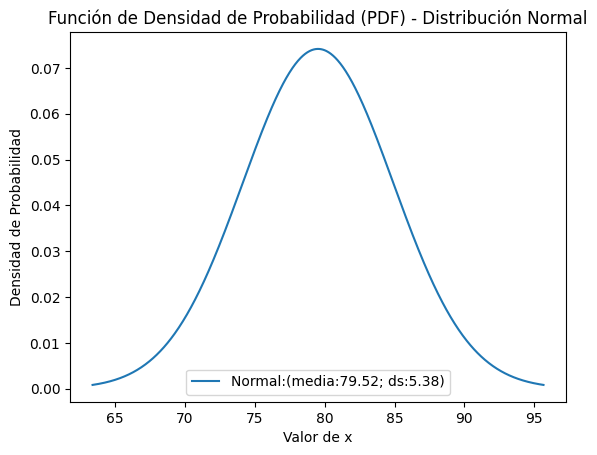

In [7]:
f_visualizar_dens_normal(num_aleatorios)

## Calcular probabilidades

Ahora bien con una densidad calculada de cada uno de los valores aleatrios generdos, ahora se puede calcular probabildia bajo un inetrvalo.

¿Cuál es la probabilidad de encontrar números entre 80 y 85?

$$
F(80 \le x \le 85)
$$

$$
F(x \le 85) - F(x \le 80)
$$

Se utiliza la función *norm.cdf()*, restando la probabilidad acumulada de 85 menos la probabilidad acumulada de 80.

In [8]:
x1 = 80
x2 = 85
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamnte ", np.round(probabilidad * 100, 2))

La probabilidad entre  80  y  85  es 0.3103 aproximadamnte  31.03


## Visualizar probabildiades

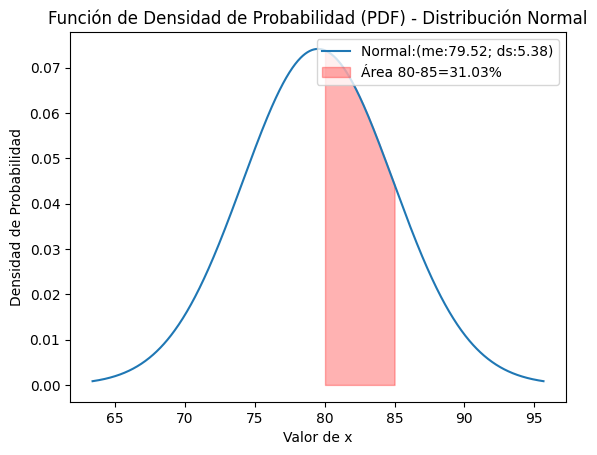

In [9]:
f_visualizar_dens_area_normal(num_aleatorios, x1, x2)

## Ejercicio estaturas pesos y generos de personas

Se carga un archivo con extensión *csv* que contiene medidas de personas. Las variables de interés son estatura en centímetros, peso en kilogramos y género que puede ser Hombre o Mujer.


### Cargar datos y análisis descriptivo

Se cargan datos y se presenta un análisis descriptivo de la cantidad de registros ,los estadísticos básicos de las variables estatura y peso así como la frecuencia por género.

Son $n=507$ registros de los cuales hay $260$ mujeres y $247$ hombres.

La media aritmética de la variable estatura es $171.14$ con desviación estándar de $9.40$; la media de la variable peso es $69.14$ con desviación estándar de $13.34$

     estatura  peso genero_cat
0       174.0  65.6     Hombre
1       175.3  71.8     Hombre
2       193.5  80.7     Hombre
3       186.5  72.6     Hombre
4       187.2  78.8     Hombre
..        ...   ...        ...
502     176.5  71.8      Mujer
503     164.4  55.5      Mujer
504     160.7  48.6      Mujer
505     174.0  66.4      Mujer
506     163.8  67.3      Mujer

[507 rows x 3 columns]
         estatura        peso
count  507.000000  507.000000
mean   171.143787   69.147535
std      9.407205   13.345762
min    147.200000   42.000000
25%    163.800000   58.400000
50%    170.300000   68.200000
75%    177.800000   78.850000
max    198.100000  116.400000
Mujer     260
Hombre    247
Name: genero_cat, dtype: int64


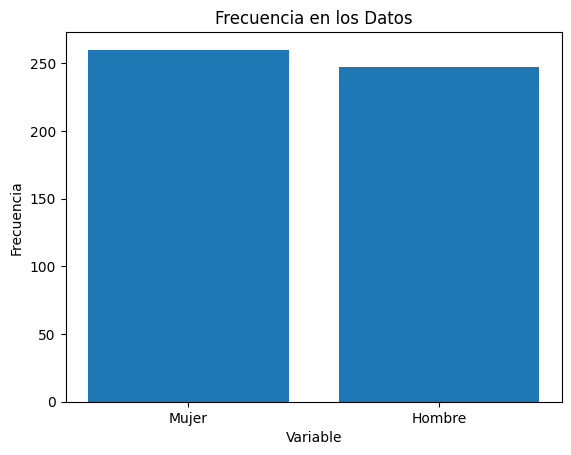

In [21]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/estatura%20peso%20generos.csv")
print(datos[['estatura', 'peso', 'genero_cat']])

print(datos[['estatura', 'peso']].describe())
# Determinar la frecuencia de cada atributo en la columna 'genero'
frecuencia_genero = datos['genero_cat'].value_counts()

# Imprimir la frecuencia
print(frecuencia_genero)

f_visualizar_frecuencia(frecuencia_genero)


### Valor esperado, varianza y desviación estándar

El valor esperado de una distribución  normal es igual a la media y la varianza es la propia varianza de los datos, así mismo la desvición es´tandra es la rai cuadrada de la varinza.



### Valor esperado

Si se elige a una persona aleatoriamente, ¿cuál será el valor esperado $VE$ de la estatura de la persona?, ¿cuánto puede variar la estatura con respeto al valor esperado $VE$?

El valor esperado es:  171.144  centímetros
En términos de varianza puede variar en: :  88.321
En términos de desvaición estándar puede variar en: :  9.3979  centímetros


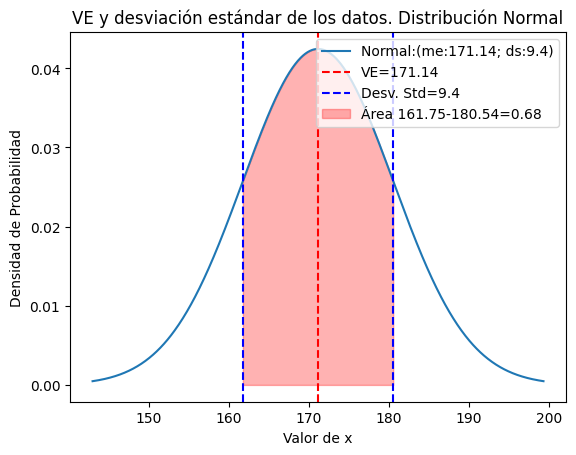

In [43]:
VE = np.mean(datos['estatura'])
print ("El valor esperado es: ", np.round(VE, 3), " centímetros")
varianza = np.var(datos['estatura'], )
print ("En términos de varianza puede variar en: : ", np.round(varianza, 4))
varianza = np.std(datos['estatura'], )
print ("En términos de desvaición estándar puede variar en: : ", np.round(varianza, 4), " centímetros")

f_visualizar_VE_desv_std_normal(datos['estatura'])

Hay un $68\%$ de probabilidad de seleccionar a una persona que tenga de estatura $171.14$ $\pm 9.4$ centímetros.

Se puede concluir en t´merios generales, que la mayoría de las personas tendrán una estatura alrededor de $171$ centímetros, y la mayoría de las diferencias estarán dentro de una desviación estándar de $9.4$ centímetros.

- El $68\%$ de los datos está entre $\mu \pm \sigma$.
- El $95\%$ de los datos está entre $\mu \pm 2 \cdot \sigma$.
- El $99\%$ de los datos está entre $\mu \pm 3 \cdot \sigma$.



### Probabilidades con datos del género hombres

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura mayor que 180 centímetros?



In [11]:
# Filtrar datos para obtener solo los hombres
 #datos_hombres = datos[datos['genero'] == 'Hombre']
datos_hombres = datos.query("genero_cat == 'Hombre'")
#print(datos_hombres['estatura'])
# Media estatura de hombres
media_est_hombres = np.mean(datos_hombres['estatura'])
desv_std_est_hombres = np.std(datos_hombres['estatura'])
print ("La media de estatura hombres", np.round(media_est_hombres, 4))
print ("La desviación estándar de estatura hombres", np.round(desv_std_est_hombres, 4))

La media de estatura hombres 177.7453
La desviación estándar de estatura hombres 7.1691


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de hombre con estatura maypr que $180$.

$$
F(x \ge 180)
$$

Restar:

$$
1 - F(x \le 180)
$$

para determinar los que están o son mayores que $180$.


La probabilidad entre  180  y  inf  es 0.3766 aproximadamente  37.66


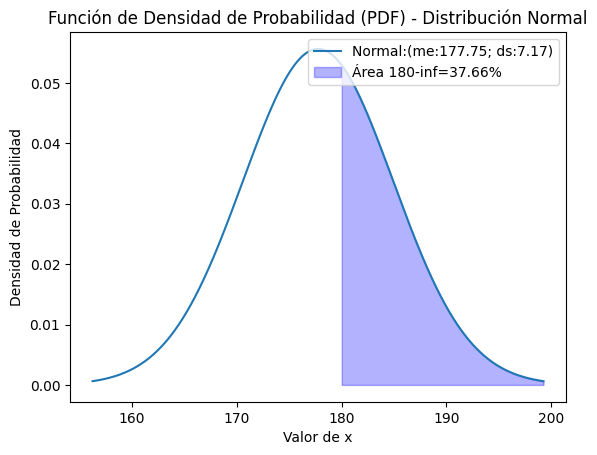

In [12]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura entre 160 y 180 centímetros?

$$
F(160 \le x \le 180)
$$

Restar:

$$
F(x \le 180) - F(x \le 160)
$$

para determinar los que están en el intervalo $160$ - $180$

La probabilidad entre  160  y  180  es 0.6168 aproximadamente  61.68


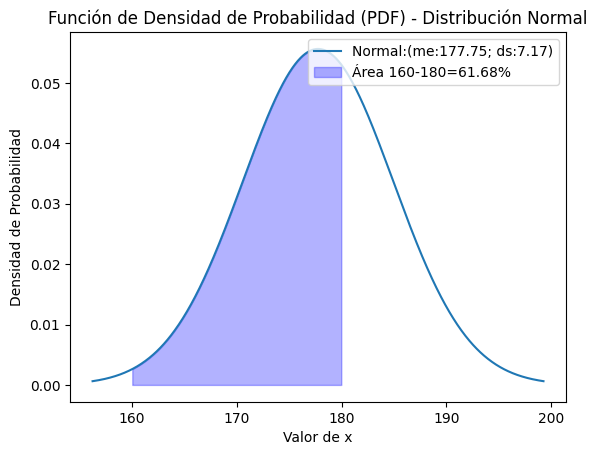

In [13]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres) - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

$$
F(x \le 165)
$$

para determinar los que están en el intervalo por debajo de $165$

La probabilidad entre  -inf  y  165  es 0.0377 aproximadamente  3.77


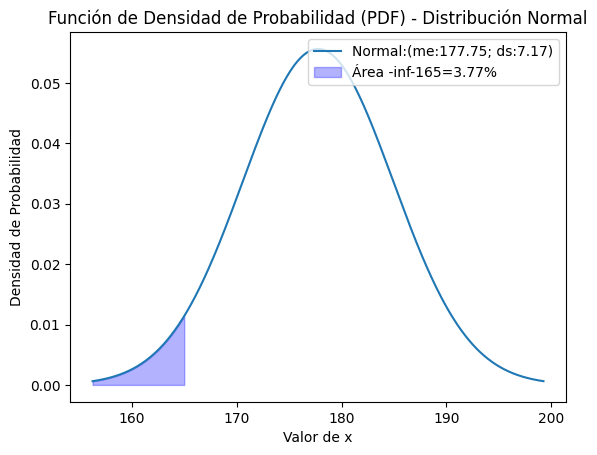

In [14]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

### Probabilidade con datos del género mujeres


#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura mayor que 180 centímetros?

In [15]:
# Filtrar datos para obtener solo las mujeres
datos_mujeres = datos.query("genero_cat == 'Mujer'")

# Media estatura de mujeres
media_est_mujeres = np.mean(datos_mujeres['estatura'])
desv_std_est_mujeres = np.std(datos_mujeres['estatura'])
print ("La media de estatura mujeres", np.round(media_est_mujeres, 4))
print ("La desviación estándar de estatura mujeres", np.round(desv_std_est_mujeres, 4))

La media de estatura mujeres 164.8723
La desviación estándar de estatura mujeres 6.532


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de la probabilidad con estatura mayr que $180$ en mujeres:

La probabilidad entre  180  y  inf  es 0.0103 aproximadamente  1.03


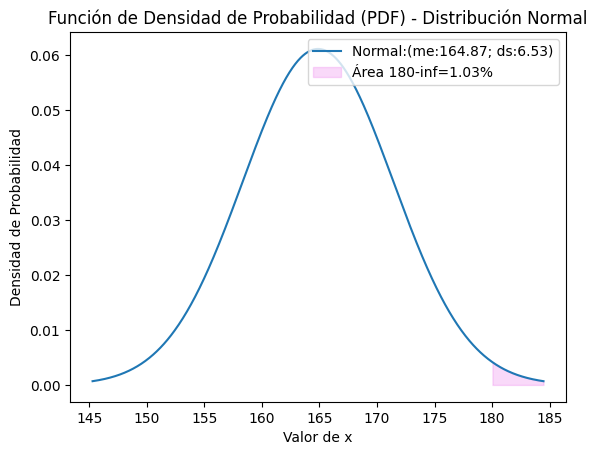

In [16]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura entre 160 y 180 centímetros?



La probabilidad entre  160  y  180  es 0.7619 aproximadamente  76.19


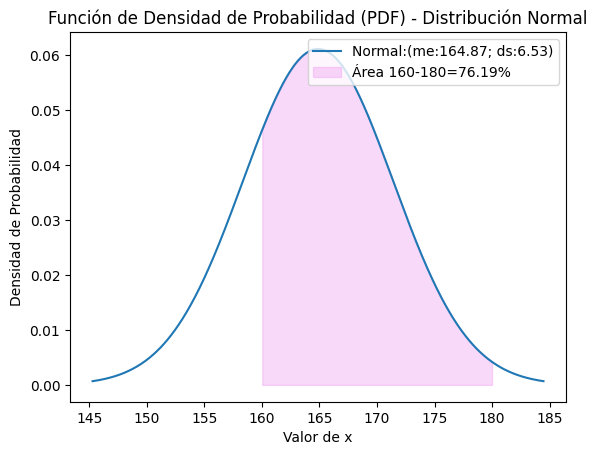

In [17]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres) - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

La probabilidad entre  -inf  y  165  es 0.5078 aproximadamente  50.78


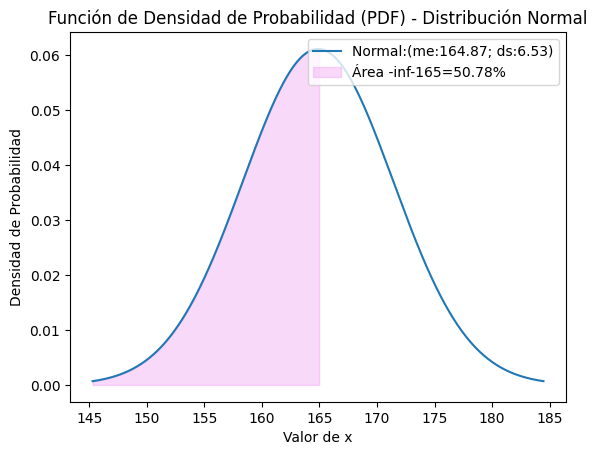

In [18]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

### Con respecto al peso de las personas hombre y mujeres

- ¿cuál es el valor esperado $VE$ si se selecciona a una persona al azar con respecto al peso corporal, independientemente si es hombre o mujer?
- ¿cuál es la varianza del peso corporal de las personas?
- ¿cuál será la desviación estándar con respeco al peso corporal, independientemente si es hombre o mujer ?


####  Con repecto al peso en kilogramos de los hombres

- ¿Cuál es la probabilidad de encontrar hombres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar hombres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar hombres que pesen menos de $65$ kilogramos?; $F(x \le 65)$

####  Con repecto al peso en kilogramos de las mujeres

- ¿Cuál es la probabilidad de encontrar mujeres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar mujeres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar mujeres que pesen menos de $65$ kilogramos?; $F(x \le 65)$



## Tiempo de duración de focos

Una empresa de material eléctrico fabrica focos de luz que tienen una duración, antes de quemarse (fundirse), que se distribuye *normalmente* con media igual a $\mu = 800$ horas y una desviación estándar de $\sigma = 40$ horas. Ejercicio extraído de [@walpole_probabilidad_2012].

Encuentre las siguientes probabilidades:

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?; $F(778 \le x \le 834)$.
- ¿cuál es la probabilidad de que un foco se queme a más de 850 horas?; $1 - F(x \le 850)$
- ¿cuál es el valor esperado $VE$ y la desviación estándar y qué significan para este contexto?

### Inicializar variables

In [15]:
# Inicializar variables
media = 800
desv_std = 40

# Se generan datos aleatorios con media y desviacin estándar similar
datos = norm.rvs(loc = media, scale = desv_std, size = 100)
print ("Los datos")
print(np.round(datos, 4))

print()
media = np.mean(datos)
desv_std = np.std(datos)

print ("La media de los datos es", np.round(media, 2))
print ("La desviación estándar de los datos es: ", np.round(desv_std, 2))


Los datos
[835.0235 753.6766 772.5098 796.1216 762.5424 780.7028 793.7301 762.4323
 801.9473 840.6324 752.6237 835.06   780.3614 783.0261 899.0588 734.8148
 751.6881 846.2043 797.0274 759.5639 746.6555 790.5004 807.3447 760.3873
 789.1697 792.7942 811.5193 790.6481 848.5705 760.7543 803.8342 833.4129
 820.6931 840.1366 795.3882 822.3983 823.7871 842.6302 838.4022 851.1257
 840.9074 822.4384 796.3698 815.8454 795.969  735.1798 814.0789 764.9228
 796.0963 777.9063 837.306  788.4517 780.6905 772.757  776.7    779.1707
 758.6263 758.7117 769.7103 830.9366 789.5298 745.523  754.8959 825.4914
 772.0943 830.8594 796.8443 740.7826 838.5006 862.0684 773.0786 810.7861
 797.0547 831.5252 778.63   799.1022 804.4978 770.4981 819.009  798.6007
 862.3801 758.7333 807.0867 802.9989 775.922  787.1098 815.4031 791.6541
 819.0631 830.2795 710.4251 807.1103 729.1362 746.1052 819.1156 799.4937
 698.2947 805.7259 873.5596 820.7124]

La media de los datos es 796.21
La desviación estándar de los datos es:  35

 ### probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834) .


La probabilidad entre  778  y  834  es 0.5477 aproximadamente  54.77


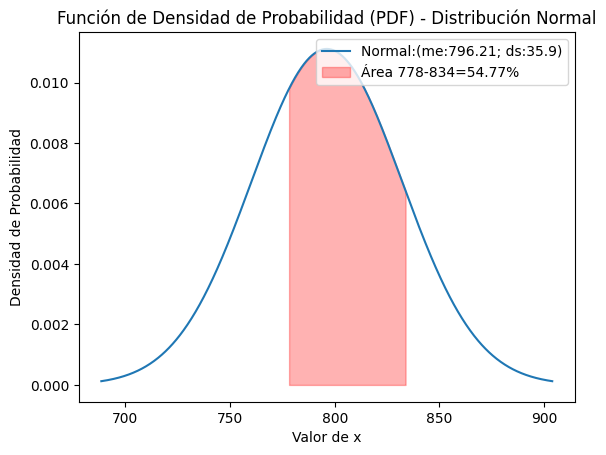

In [16]:
# El intervalo
x1 = 778
x2 = 834

# La probabilidad
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

### Probabilidad de que un foco se queme a más de 850 horas?;  1−F(x≤850)

La probabilidad entre  850  y  inf  es 0.067 aproximadamente  6.7


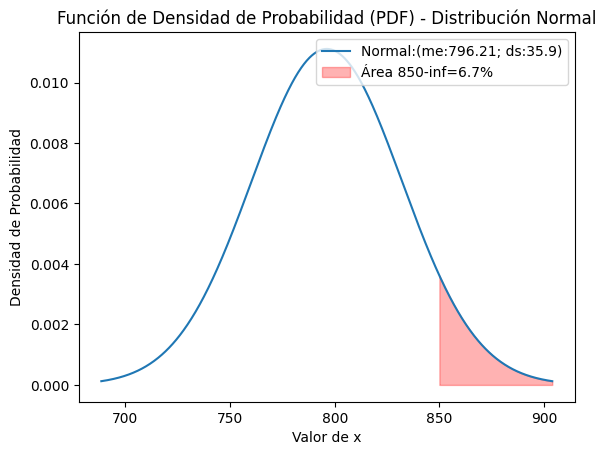

In [19]:
## El intervalo
x1 = 850
x2 = np.Inf

# La probabilidad
probabilidad  = 1 - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

# Eercicio de los sueldos

Los sueldos mensuales en una empresa siguen una distribución *normal* con media de *16000* pesos, y desviación estándar de 1000 pesos.

- ¿qué porcentaje de trabajadores ganan entre 10000 y 15000 pesos?; $F(10000\le x \le 15000)$
- ¿qué porcentaje de trabajadores ganan menos de 8500 pesos ?; $F(x \le 8500)$
- ¿qué porcentaje de trabajadores ganan más de 10000 pesos; $1 - F(x \le 10000)$ ?
- ¿qué significado tiene el valor esperado y la desviación estándar en este contexto?

# Interpretación del caso

Con los datos de estatura y peso corporal de personas cargados en el caso:

- ¿Qué es más probable: encontrar hombres por que midan por encima del $180$ centímetros de estatura o mujeres por encima del $180$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. **Resp**: Existe una probabilidad del $37$% de encontrar hombres con estatura superior al 180 centímetros en relación al $1.03$% de encontrar mujeres por encima del $180$ centímetros de estatura por lo que es más probable que se dé la primera aseveración.

- ¿Qué es más probable: encontrar hombres por que midan por debajo o igual a $165$ centímetros de estatura o mujeres por debajo o igual a $165$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. Es más probable encontrar mujeres con estatura por debajo del $165$ centímeros con el $50.78$% aproximadamente en relación al $3.77$% de encontrar hombres por debajo de $165$ centímetros aproximadamente.

Las probabilidades se calcularon en relación a los datos cargados.

- ¿Qué es más probable, encontrar hombres con peso superior a $80$ kilogramos o mujeres con peso superior a $80$ kilogramos?; con las probabilidades calculadas se responde la pregunta.

- Qué es más probable, encontrar hombres con un peso corporal menor a $65$ kilogramos o mujeres con peso corporal menor a $65$ kilogramos?. Con las probabilidades calculadas se responde la pregunta.

Con el ejercicio de la duración de los focos

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834).
- ¿cuál es la probabilidad de que un foco se queme a más de 850 horas?;  1−F(x≤850)
- ¿cuál es el valor esperado  VE  y la desviación estándar y qué significan para este contexto?

Con el ejercicio de los sueldos:

- ¿qué porcentaje de trabajadores ganan entre 10000 y 15000 pesos?; $F(10000\le x \le 15000)$
- ¿qué porcentaje de trabajadores ganan menos de 8500 pesos ?; $F(x \le 8500)$
- ¿qué porcentaje de trabajadores ganan más de 10000 pesos; $1 - F(x \le 10000)$ ?
- ¿qué significado tiene el valor esperado y la desviación estándar en este contexto?


# Bibliografía

- UC3M. n.d. “Introducción a La Estadística y Probabilidad.” http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_continuous2.pdf.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.